In [3]:
#3a)
library("ISLR2")

In [4]:
library("MASS")

In [5]:
library("caret")

Loading required package: ggplot2

Loading required package: lattice



In [6]:
help(Boston)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [7]:
#copying the data into a data frame
boston <- data.frame(Boston)

In [9]:
#creating response variable
boston$resp <- "Low"
boston$resp[boston$crim > median(boston$crim)] <- "High"
boston$resp <-factor(boston$resp)
table(boston$resp)


High  Low 
 253  253 

In [10]:
#dropping the old crim variable
boston <- boston[-c(1)]

In [11]:
#creating training and test data sets
index <- createDataPartition(y = boston$resp, p = 0.8, list = FALSE)

train <- boston[index,]
test <- boston[-index,]

dim(train)
head(train)
dim(test)
head(test)

[1] 406  14

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,resp
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Low
2,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Low
3,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,Low
4,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,Low
5,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Low
6,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,Low


[1] 100  14

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,resp
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,Low
15,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,High
16,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,High
19,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2,High
22,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6,High
29,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80,18.4,High


In [12]:
nzv <- nearZeroVar(train, saveMetrics = TRUE)
nzv

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
zn,19.866667,6.4039409,FALSE,TRUE
indus,4.458333,18.4729064,FALSE,FALSE
chas,13.000000,0.4926108,FALSE,FALSE
nox,1.214286,19.9507389,FALSE,FALSE
rm,1.000000,90.1477833,FALSE,FALSE
age,8.500000,73.3990148,FALSE,FALSE
dis,1.000000,85.9605911,FALSE,FALSE
rad,1.229885,2.2167488,FALSE,FALSE
tax,3.451613,16.2561576,FALSE,FALSE


In [13]:
Cor <- cor(train[,-14])
Cor

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
zn,1.00000000,-0.54428219,-0.04284187,-0.5318557,0.2989367,-0.61155144,0.6822325,-0.31774950,-0.31591682,-0.3825392,0.17136464,-0.42549483,0.3506032
indus,-0.54428219,1.00000000,0.05424655,0.7718300,-0.3881880,0.67668325,-0.7213434,0.59138886,0.70755020,0.3863833,-0.33257250,0.59760625,-0.4757641
chas,-0.04284187,0.05424655,1.00000000,0.0979497,0.1070114,0.09230327,-0.1051803,0.02260308,-0.01464189,-0.1070713,0.06384742,-0.07244885,0.1958447
nox,-0.53185566,0.77183001,0.09794970,1.0000000,-0.3100801,0.74292264,-0.7706752,0.63029195,0.68658203,0.2169728,-0.33280454,0.58000047,-0.4281224
rm,0.29893666,-0.38818801,0.10701144,-0.3100801,1.0000000,-0.25335259,0.2150792,-0.21745851,-0.29201017,-0.3247038,0.12375966,-0.60543184,0.6764862
age,-0.61155144,0.67668325,0.09230327,0.7429226,-0.2533526,1.00000000,-0.7538819,0.48266848,0.53209085,0.3066388,-0.27812534,0.60373416,-0.4005028
dis,0.68223246,-0.72134336,-0.10518034,-0.7706752,0.2150792,-0.75388192,1.0000000,-0.50411822,-0.54652414,-0.2620634,0.27589502,-0.50539367,0.2598047
rad,-0.31774950,0.59138886,0.02260308,0.6302919,-0.2174585,0.48266848,-0.5041182,1.00000000,0.91535627,0.4678315,-0.43017183,0.51945884,-0.3906914
tax,-0.31591682,0.70755020,-0.01464189,0.6865820,-0.2920102,0.53209085,-0.5465241,0.91535627,1.00000000,0.4658560,-0.42628582,0.55751098,-0.4664031
ptratio,-0.38253923,0.38638332,-0.10707127,0.2169728,-0.3247038,0.30663880,-0.2620634,0.46783152,0.46585601,1.0000000,-0.19096886,0.40176024,-0.4974272


In [14]:
highCor <- findCorrelation(Cor, cutoff = 0.75)
highCor

[1] 2 4 9 6

No variables are near zero variance. However, we see that industrial area and NOx are highly correlated with each other (and other variables), property tax is also highly correlated with other variables. For now we will remove the property tax variable and NOx.

In [17]:
train_cor <- train[,-c(2,9)]
test_cor <- test[,-c(2,9)]

head(train_cor)
head(test_cor)

,zn,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv,resp
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0,Low
2,0,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6,Low
3,0,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7,Low
4,0,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4,Low
5,0,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2,Low
6,0,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21,28.7,Low


,zn,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv,resp
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,12.5,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93,16.5,Low
15,0.0,0,0.538,6.096,84.5,4.4619,4,21.0,380.02,10.26,18.2,High
16,0.0,0,0.538,5.834,56.5,4.4986,4,21.0,395.62,8.47,19.9,High
19,0.0,0,0.538,5.456,36.6,3.7965,4,21.0,288.99,11.69,20.2,High
22,0.0,0,0.538,5.965,89.2,4.0123,4,21.0,392.53,13.83,19.6,High
29,0.0,0,0.538,6.495,94.4,4.4547,4,21.0,387.94,12.80,18.4,High


In [18]:
#Applying logistic regression 
logistic <- train(resp~., data=train, 
               method='glm', family=binomial(link='logit'),
               preProcess=c('scale', 'center'))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [19]:
summary(logistic)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.74303  -0.00164   0.00010   0.14275   1.98031  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.4269     0.8156  -2.976  0.00292 ** 
zn            2.5566     1.0229   2.499  0.01244 *  
indus         0.4447     0.3436   1.294  0.19557    
chas         -0.1781     0.2273  -0.783  0.43341    
nox          -5.8115     1.0009  -5.806 6.39e-09 ***
rm            0.2583     0.5633   0.459  0.64651    
age          -0.6813     0.4292  -1.587  0.11241    
dis          -1.4789     0.5549  -2.665  0.00770 ** 
rad          -5.9966     1.5389  -3.897 9.76e-05 ***
tax           1.2553     0.5372   2.337  0.01945 *  
ptratio      -0.6077     0.2948  -2.061  0.03926 *  
black         0.9417     0.5287   1.781  0.07492 .  
lstat        -0.3267     0.4043  -0.808  0.41909    
medv         -1.3229     0.6857  -1.929  0.05372 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

In [21]:
confusionMatrix(predict(logistic, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   43   2
      Low     7  48
                                        
               Accuracy : 0.91          
                 95% CI : (0.836, 0.958)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.82          
                                        
 Mcnemar's Test P-Value : 0.1824        
                                        
            Sensitivity : 0.8600        
            Specificity : 0.9600        
         Pos Pred Value : 0.9556        
         Neg Pred Value : 0.8727        
             Prevalence : 0.5000        
         Detection Rate : 0.4300        
   Detection Prevalence : 0.4500        
      Balanced Accuracy : 0.9100        
                                        
       'Positive' Class : High          
                                        

Most of these variables are actually not significant in the model, we might as well remove the non-significant ones.

In [24]:

logistic <- train(resp ~ rad + nox,
               data=train, 
               method='glm', family=binomial(link='logit'),
               preProcess=c('scale', 'center'))
summary(logistic)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20749  -0.00718   0.02485   0.32032   1.98505  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.6184     0.5780  -4.530 5.90e-06 ***
rad          -4.3492     0.9655  -4.505 6.65e-06 ***
nox          -3.4035     0.4306  -7.905 2.69e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 562.84  on 405  degrees of freedom
Residual deviance: 206.68  on 403  degrees of freedom
AIC: 212.68

Number of Fisher Scoring iterations: 8


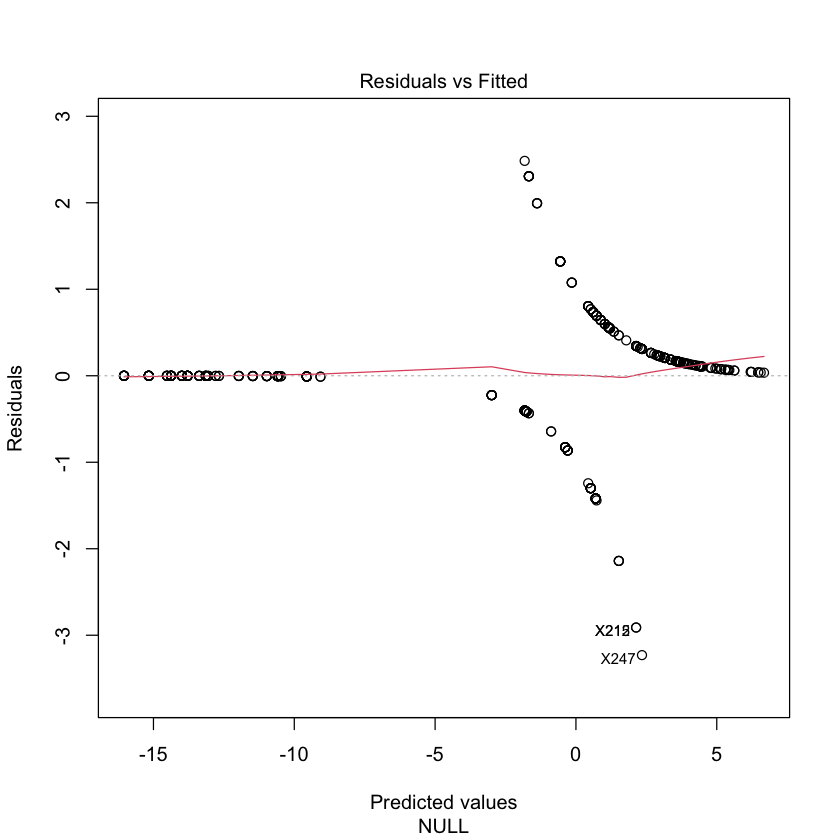

In [25]:
plot(logistic$finalModel, which=1)

In [27]:
confusionMatrix(predict(logistic, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   39   3
      Low    11  47
                                          
               Accuracy : 0.86            
                 95% CI : (0.7763, 0.9213)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 4.142e-14       
                                          
                  Kappa : 0.72            
                                          
 Mcnemar's Test P-Value : 0.06137         
                                          
            Sensitivity : 0.7800          
            Specificity : 0.9400          
         Pos Pred Value : 0.9286          
         Neg Pred Value : 0.8103          
             Prevalence : 0.5000          
         Detection Rate : 0.3900          
   Detection Prevalence : 0.4200          
      Balanced Accuracy : 0.8600          
                                          
       'Positive' Class : High            
                           

In [28]:
#applying LDA
lda <- train(resp~., data=train_cor,
             method='lda', 
             preProcess=c('scale', 'center'))
lda

Linear Discriminant Analysis 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: scaled (11), centered (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa    
  0.8541501  0.7087382


In [29]:
confusionMatrix(test_cor$resp, predict(lda, test_cor[,-12]))

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   38  12
      Low     2  48
                                          
               Accuracy : 0.86            
                 95% CI : (0.7763, 0.9213)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 1.293e-08       
                                          
                  Kappa : 0.72            
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.950           
            Specificity : 0.800           
         Pos Pred Value : 0.760           
         Neg Pred Value : 0.960           
             Prevalence : 0.400           
         Detection Rate : 0.380           
   Detection Prevalence : 0.500           
      Balanced Accuracy : 0.875           
                                          
       'Positive' Class : High            
                           

In [30]:
#Applying QDA
qda <- train(resp~., data=train_cor,
             method='qda', 
             preProcess=c('scale', 'center'))
qda

Quadratic Discriminant Analysis 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: scaled (11), centered (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa    
  0.8622271  0.7240097


In [31]:
confusionMatrix(test_cor$resp, predict(qda, test_cor[,-12]))

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   40  10
      Low     5  45
                                          
               Accuracy : 0.85            
                 95% CI : (0.7647, 0.9135)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : 1.716e-10       
                                          
                  Kappa : 0.7             
                                          
 Mcnemar's Test P-Value : 0.3017          
                                          
            Sensitivity : 0.8889          
            Specificity : 0.8182          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9000          
             Prevalence : 0.4500          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.8535          
                                          
       'Positive' Class : High            
                           

The resuls are slightly lower than LDA and logistic regression

In [32]:
#Applying KNN 
knnGrid <- expand.grid(.k=c(2))
# Use k = 2, since we expect 2 classes
KNN <- train(x=train_cor[,-12], method='knn',
             y=train_cor$resp, 
             preProcess=c('center', 'scale'), 
             tuneGrid = knnGrid)
KNN

k-Nearest Neighbors 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: centered (11), scaled (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy  Kappa    
  0.866332  0.7320475

Tuning parameter 'k' was held constant at a value of 2

In [33]:
confusionMatrix(predict(KNN, test_cor[,-12]), test_cor$resp)


Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   43   6
      Low     7  44
                                         
               Accuracy : 0.87           
                 95% CI : (0.788, 0.9289)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : 6.565e-15      
                                         
                  Kappa : 0.74           
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.8600         
            Specificity : 0.8800         
         Pos Pred Value : 0.8776         
         Neg Pred Value : 0.8627         
             Prevalence : 0.5000         
         Detection Rate : 0.4300         
   Detection Prevalence : 0.4900         
      Balanced Accuracy : 0.8700         
                                         
       'Positive' Class : High           
                                         

This gives us better results than LDA,QDA and logistic regression
However, let’s try using principal component analysis instead of removing correlated variables

In [34]:
KNN <- train(x=train[,-14], method='knn',
             y=train$resp, 
             preProcess=c('center', 'scale', 'pca'), 
             tuneGrid = knnGrid)
KNN

k-Nearest Neighbors 

406 samples
 13 predictor
  2 classes: 'High', 'Low' 

Pre-processing: centered (13), scaled (13), principal component
 signal extraction (13) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa   
  0.8763958  0.751304

Tuning parameter 'k' was held constant at a value of 2

In [35]:
confusionMatrix(predict(KNN, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   44   4
      Low     6  46
                                         
               Accuracy : 0.9            
                 95% CI : (0.8238, 0.951)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8            
                                         
 Mcnemar's Test P-Value : 0.7518         
                                         
            Sensitivity : 0.8800         
            Specificity : 0.9200         
         Pos Pred Value : 0.9167         
         Neg Pred Value : 0.8846         
             Prevalence : 0.5000         
         Detection Rate : 0.4400         
   Detection Prevalence : 0.4800         
      Balanced Accuracy : 0.9000         
                                         
       'Positive' Class : High           
                                         

This model is about 4% better than the other models.
Of all the models fitted with the dataset, there is high crime rate in boston.
with knn giving as 90% accuracy scores along with LDA and logistic regression with almost 86% and QDA with 85% accuracy.

In [39]:
library("ISLR2")
library("MASS")
library("caret")

In [148]:
#3b)
data(Boston)
df <- Boston 
head(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [149]:
quants <- quantile(df$crim)

df$crim <- cut(df$crim,
              breaks=c(0, quants[2], quants[4], quants[5]),
              labels=c("Low", "Medium", "High"))

In [150]:
train_test_fun <- function(n){
    set.seed(n)
    train_index <- sample(1: nrow(new_df), (2/3)*(nrow(new_df)), replace = FALSE)
    train_df <- new_df[train_index, ]
    test_df <- new_df[-train_index, ]
    return_list <- list(first = train_df, second = test_df)
    return (return_list)
}

In [151]:
new_df <- data.frame(df)
x <- train_test_fun(150)
train_df <- x$first 
test_df <- x$second 
y_true_train <- train_df[, 1]
y_true_test <- test_df[, 1]



head(train_df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
291,Low,80,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5
494,Medium,0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
403,High,0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
145,Medium,0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
387,High,0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
276,Medium,40,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0


In [153]:
multi_logit <- nnet :: multinom(crim~., data = train_df)

# weights:  45 (28 variable)
initial  value 370.232341 
iter  10 value 170.816350
iter  20 value 145.384621
iter  30 value 102.147239
iter  40 value 97.549214
iter  50 value 97.208458
iter  60 value 97.111755
iter  70 value 97.054611
iter  80 value 96.845305
iter  90 value 96.817297
iter 100 value 96.810639
final  value 96.810639 
stopped after 100 iterations


In [154]:
summary(multi_logit)

Call:
nnet::multinom(formula = crim ~ ., data = train_df)

Coefficients:
       (Intercept)          zn      indus       chas      nox        rm
Medium   -1.643186 -0.04159668 0.07706436 0.11187197 4.169003 0.2756759
High     -8.558315  0.24781786 0.65700813 0.04922242 8.118478 0.2931379
                age          dis       rad         tax    ptratio       black
Medium -0.004657809  0.007794259 0.5416768 0.005743019  0.1181242 -0.02884432
High    0.159218290 -3.899325643 1.9202684 0.002648677 -1.4382393 -0.01428305
           lstat        medv
Medium 0.1998910  0.07343013
High   0.0933498 -0.28324077

Std. Errors:
       (Intercept)          zn      indus       chas        nox         rm
Medium  0.02199497 0.012552695 0.05024932 0.84686387 0.02224726 0.75881864
High    0.01367028 0.003565155 0.30420044 0.02906657 0.01886044 0.06728664
              age        dis       rad         tax    ptratio      black
Medium 0.01216331 0.17015435 0.1332944 0.003445623 0.12954039 0.01133231
High 

In [164]:
train_pred <- predict(multi_logit, data = train_df)
test_pred <- predict(multi_logit, data = test_df)

train_pred

[1] Low    Medium High   Medium High   Low    Medium High   Low    High  
 [11] High   Medium Low    High   Medium High   Medium High   Low    Low   
 [21] High   High   Medium Medium Medium High   High   Medium Low    Medium
 [31] Medium High   High   Medium Medium Medium High   High   Low    Medium
 [41] Medium Low    High   Low    High   Medium Medium Low    Low    High  
 [51] High   Medium Medium Medium Medium High   Medium High   Medium Low   
 [61] High   Medium Medium Medium Medium Medium High   Low    Medium Low   
 [71] Low    Medium High   Medium Low    High   Medium Medium Medium Medium
 [81] Medium Medium Medium Low    Medium High   Medium Low    Medium Medium
 [91] Medium Medium Medium Low    Medium Medium Low    Medium High   Medium
[101] Low    High   High   Medium Low    Low    Low    High   Medium High  
[111] Medium Medium Medium Medium Medium Medium Medium Medium Low    Low   
[121] Medium Medium Medium Low    Medium High   High   High   High   Low   
[131] Medium Low    Medium Low    High   High   Medium Medium Medium High  
[141] Low    Medium Medium Low    Medium Medium Medium Low    Low    Medium
[151] Medium Low    Medium Medium Medium Low    Medium High   Medium Low   
[161] Low    Medium Medium High   Low    Medium Low    Medium Medium Low   
[171] High   High   Low    High   Low    High   Medium Medium Medium High  
[181] High   High   High   High   High   High   Medium Medium High   Medium
[191] High   Medium Low    Medium Medium High   Medium Medium High   Medium
[201] Medium Medium Medium Medium Medium Low    Low    Medium Medium Medium
[211] Medium Low    Medium High   Medium High   Medium High   Medium Medium
[221] Medium Medium High   Medium High   Medium High   Medium Medium Low   
[231] Medium Medium Medium Low    Low    High   High   Medium Medium Medium
[241] Low    Medium Low    Medium Low    Medium Medium Low    Medium High  
[251] Medium Medium Low    Medium Medium Low    Medium High   Low    Low   
[261] High   Medium Low    Medium Medium Medium Low    Medium Medium Low   
[271] Medium High   Medium Medium High   Medium High   High   Medium Medium
[281] Medium Low    Medium Medium High   Medium Low    Medium Medium Medium
[291] Medium Medium Low    Low    Medium Low    Medium Low    Low    High  
[301] Medium High   Medium Low    High   Medium Low    High   Low    High  
[311] High   Low    Medium High   High   High   Medium Low    Medium Low   
[321] Medium Medium Medium Low    High   Low    Medium Medium High   Medium
[331] Medium High   Medium Medium Medium High   Medium
Levels: Low Medium High

In [156]:
train_err.multilogit <- mean(train_pred != y_true_train)
test_err.multilogit <- mean(test_pred != y_true_test)

train_err.multilogit
test_err.multilogit

Warning message in `!=.default`(test_pred, y_true_test):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


[1] 0.1513353

[1] 0.620178

In [167]:
#Applying LDA
lda_func <- function(train_df, test_df){
    
    y_true_train <- train_df$crim
    y_true_test <- test_df$crim
    
    lda.fit <- lda(crim ~., data= train_df)
    
    train_pred.lda <- predict(lda.fit, newdata = train_df)
    test_pred.lda <- predict(lda.fit, newdata = test_df)
    
    y_hat_train.lda <- train_pred.lda$class
    y_hat_test.lda <- test_pred.lda$class


    train_error.lda <- round((1/length(y_hat_train.lda))*(length(which(y_true_train != y_hat_train.lda))), 3)
    test_error.lda <- round((1/length(y_hat_test.lda))*(length(which(y_true_test != y_hat_test.lda))), 3)
    
    confMatrix.lda <- table(y_hat_test.lda, y_true_test)
    
    accuracy.lda <- round(sum(diag(confMatrix.lda))/sum(confMatrix.lda) * 100, 2)
    
    return_list <- list(model = lda.fit, pred_train = y_hat_train.lda, 
                        pred_test = y_hat_test.lda, train_err = train_error.lda,
                        test_err = test_error.lda, accuracy = accuracy.lda)
}

In [169]:
x <- lda_func(train_df, test_df)
x

$model
Call:
lda(crim ~ ., data = train_df)

Prior probabilities of groups:
      Low    Medium      High 
0.2611276 0.4866469 0.2522255 

Group means:
              zn     indus       chas       nox       rm      age      dis
Low    33.505682  5.266477 0.05681818 0.4563943 6.542511 43.67500 5.553102
Medium  4.984756 10.988598 0.09146341 0.5451098 6.267280 69.74024 3.710706
High    0.000000 18.117412 0.05882353 0.6825176 6.018635 91.98941 2.033613
             rad      tax  ptratio    black     lstat     medv
Low     3.590909 291.1818 17.51477 390.9778  7.344659 26.63750
Medium  5.073171 334.6220 18.10549 371.6043 12.115305 23.19573
High   23.776471 662.9059 20.13529 294.4914 19.349647 15.44471

Coefficients of linear discriminants:
                  LD1           LD2
zn       2.833007e-03  0.0443510063
indus    1.971653e-02 -0.0430334561
chas    -3.109577e-02 -0.1453314359
nox      1.874032e+00 -0.9231978353
rm       8.180517e-02  0.0625602447
age     -1.048115e-04 -0.0098093261
dis  

In [175]:
qda(crim~., data= train_df)

ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group High


In [183]:
library("class")

In [188]:
#Applying KNN
knn_func <- function(train_df, test_df){
    
    y_true_train <- train_df[, 1]
    y_true_test <- test_df[, 1]

    x_train <- train_df[, 2:13]
    x_test <- test_df[, 2:13] 
    
    preprocess <- preProcess(x_train, method = c('scale'))
    x_train <- predict(preprocess, x_train)
    x_test <- predict(preprocess, x_test)
    
    k <- c(1, 2, 3, 5, 7, 9, 11, 13, 15)
    k_error <- rep(NA, length(k))
    for (i in 1:length(k)) {
        y_pred_testknn <- knn(x_train, x_test, y_true_train, k[i])
        k_error[i] <- round(mean(y_pred_testknn != y_true_test),3)
    }
    
    return_list <- list(k_values = k, errors = k_error)
}
  

In [189]:
knn_x <- knn_func(train_df, test_df)
knn_x

$k_values
[1]  1  2  3  5  7  9 11 13 15

$errors
[1] 0.189 0.154 0.136 0.136 0.160 0.154 0.172 0.178 0.189

#3c)
from both a and b, it is observed that logistic regression perfomed well in both the scenarios when considering medium and without considering medium with an accuracy rate of about 85% and error of 15%. 
Whereas, knn performed well when considering only high or low and underpeformed when considering the third parameter, medium crime rate. Knn performed with 90% accuracy (the highest among every other model used) in a and shown almost 85% accuracy in b.
Even, LDA perfomed slightly better in a with an accuracy of 86% whereas in b, it perfomed with an accuracy of 84%, returning an error rate of almost 16%.
But, QDA performed similar to LDA and logistic regression in a but failed to execute in b with an error stating Rank deficiency.

I was expecting to get more accurate results when the medium crime rate is considered in b but surprsingly, the models underpeformed than in a.
I think, when there are too many ranges of crime rates, the models might not work with greater accuracy than when the ranges are minimal.